In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import time
import sklearn.decomposition as skdec

from skimage.io import imread
import scipy

import matplotlib.animation as animation
from IPython.display import HTML

import sys
import os
from pytictoc import TicToc
import matplotlib
import pickle

from skimage import filters, morphology
rootff = ''
sys.path.append(rootff+'/SpeckledFluoImagingAnalisys/')

import speckle_stuffs as spkstf
from moro_utils import eprint
import h5py

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# skull dataset

root_folder = 'rootff+'/20112019/'
# print(os.listdir(root_folder))
video2000 = spkstf.extract_from_mat(root_folder+'data_20112019_001.mat', 'video_data')
video1500 = spkstf.extract_from_mat(root_folder+'data_20112019_004.mat', 'video_data')
video1000 = spkstf.extract_from_mat(root_folder+'data_20112019_002.mat', 'video_data')
video0500 = spkstf.extract_from_mat(root_folder+'data_20112019_005.mat', 'video_data')
video0000 = spkstf.extract_from_mat(root_folder+'data_20112019_003.mat', 'video_data')

# filter the images
videof2000 = spkstf.gauss_don_filt_GPU(video2000, hp=1.5, lp=600)
videof1500 = spkstf.gauss_don_filt_GPU(video1500, hp=1.5, lp=600)
videof1000 = spkstf.gauss_don_filt_GPU(video1000, hp=1.5, lp=600)
videof0500 = spkstf.gauss_don_filt_GPU(video0500, hp=1.5, lp=600)
videof0000 = spkstf.gauss_don_filt_GPU(video0000, hp=1.5, lp=600)

# save everything
with h5py.File(root_folder+'data_20112019_001_filtered.hdf5', "w") as f:
    dset = f.create_dataset("filtered_video", data=videof2000)
with h5py.File(root_folder+'data_20112019_004_filtered.hdf5', "w") as f:
    dset = f.create_dataset("filtered_video", data=videof1500)
with h5py.File(root_folder+'data_20112019_002_filtered.hdf5', "w") as f:
    dset = f.create_dataset("filtered_video", data=videof1000)
with h5py.File(root_folder+'data_20112019_005_filtered.hdf5', "w") as f:
    dset = f.create_dataset("filtered_video", data=videof0500)
with h5py.File(root_folder+'data_20112019_003_filtered.hdf5', "w") as f:
    dset = f.create_dataset("filtered_video", data=videof0000)

cannot import cuda libraries, filtering with the CPU...
cannot import cuda libraries, filtering with the CPU...
cannot import cuda libraries, filtering with the CPU...
cannot import cuda libraries, filtering with the CPU...
cannot import cuda libraries, filtering with the CPU...


In [132]:
# load the files
root_folder = rootff+'/20112019/'
videof2000 = h5py.File(root_folder+'data_20112019_001_filtered.hdf5','r')['filtered_video']
videof1500 = h5py.File(root_folder+'data_20112019_004_filtered.hdf5','r')['filtered_video']
videof1000 = h5py.File(root_folder+'data_20112019_002_filtered.hdf5','r')['filtered_video']
videof0500 = h5py.File(root_folder+'data_20112019_005_filtered.hdf5','r')['filtered_video']
videof0000 = h5py.File(root_folder+'data_20112019_003_filtered.hdf5','r')['filtered_video']

In [135]:
from moro_utils import printProgressBar

framesno = len(videof0000)

cc0000 = np.zeros((framesno, framesno))
for i in range(framesno):
    for j in range(i, framesno):
        printProgressBar(int((i*framesno+j)/2), int((framesno*framesno)/2))
        cc0000[i, j] = spkstf.zero_norm_crosscorr(videof0000[i], videof0000[j])
        
cc0500 = np.zeros((framesno, framesno))
for i in range(framesno):
    for j in range(i, framesno):
        printProgressBar(int((i*framesno+j)/2), int((framesno*framesno)/2))
        cc0500[i, j] = spkstf.zero_norm_crosscorr(videof0500[i], videof0500[j])
        
cc1000 = np.zeros((framesno, framesno))
for i in range(framesno):
    for j in range(i, framesno):
        printProgressBar(int((i*framesno+j)/2), int((framesno*framesno)/2))
        cc1000[i, j] = spkstf.zero_norm_crosscorr(videof1000[i], videof1000[j])
        
cc1500 = np.zeros((framesno, framesno))
for i in range(framesno):
    for j in range(i, framesno):
        printProgressBar(int((i*framesno+j)/2), int((framesno*framesno)/2))
        cc1500[i, j] = spkstf.zero_norm_crosscorr(videof1500[i], videof1500[j])
        
cc2000 = np.zeros((framesno, framesno))
for i in range(framesno):
    for j in range(i, framesno):
        printProgressBar(int((i*framesno+j)/2), int((framesno*framesno)/2))
        cc2000[i, j] = spkstf.zero_norm_crosscorr(videof2000[i], videof2000[j])

 |***************************************************************************************************-| : 5201/5202

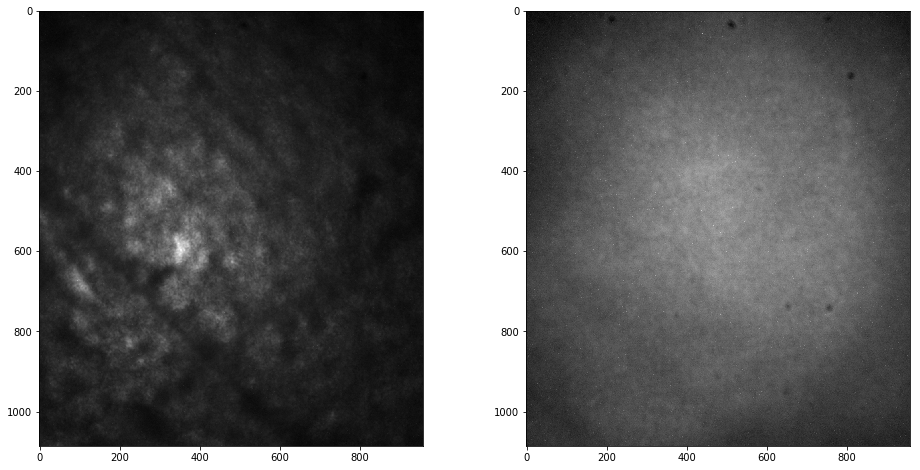

In [8]:
root_folder = rootff+'/20112019/'

video2000 = spkstf.extract_from_mat(root_folder+'data_20112019_001.mat', 'video_data')
video0000 = spkstf.extract_from_mat(root_folder+'data_20112019_003.mat', 'video_data')

fig = plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(np.mean(video0000, axis=0), cmap='gray')
plt.subplot(122)
plt.imshow(np.mean(video2000, axis=0), cmap='gray')
plt.show()

fig.savefig(rootff+'/contrast_average.pdf',dpi=1200)


In [5]:
fdistance_match= {
    '001': 2000,
    '002': 1000,
    '003': 0,
    '004': 1500,
    '005': 500,
    '006': 0,
    '007': 1000,
    '008': 2000,
    '009': 1500,
    '010': 500
        }

depth_match = {
    '001': 170,
    '002': 170,
    '003': 170,
    '004': 170,
    '005': 170,
    '006': 680,
    '007': 680,
    '008': 680,
    '009': 680,
    '010': 680
        }

def getserie(filename):
    return filename.split('_')[-2]

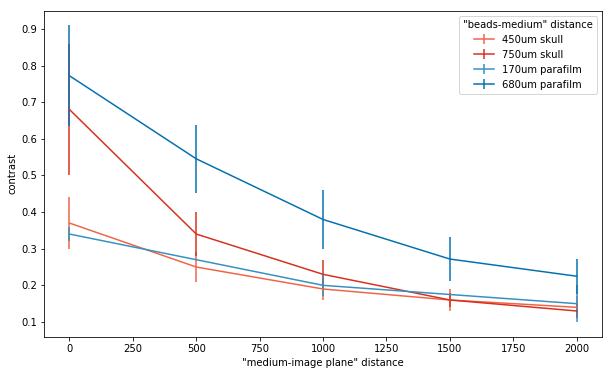

In [109]:
# contrast over the distance between skulla and beads, and between skull and imaged plane
# analisys perfomed on matlab, here only plot

D2 = [0, 500, 1000, 1500, 2000]
D1_450 = [0.37, 0.25, 0.19, 0.16, 0.14]
D1_450_err = [0.07, 0.04, 0.03, 0.03, 0.03]
D1_750 = [0.68, 0.34, 0.23, 0.16, 0.13]
D1_750_err = [0.18, 0.06, 0.04, 0.02, 0.02]

D2p = [0, 1000, 2000]
D1_slip1 = [0.34, 0.2,  0.15]
D1_slip1_err = [0.02, 0.03,  0.05]
D1_slip2 = [0.36, 0.22,  0.18]
D1_slip2_err = [0.02, 0.03,  0.03]
D1_slip3 = [0.34, 0.22,  0.15]
D1_slip3_err = [0.06, 0.03,  0.04]


df = df.sort_values(by=['depth_dist'])

D1_680 = np.array(df[df.focal_dist==680]['contrast'])
D1_680_err = np.array(df[df.focal_dist==680]['std'])

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.errorbar(D2, D1_450, yerr=D1_450_err, label='450um skull', color='#ef6548')
ax.errorbar(D2, D1_750, yerr=D1_750_err, label='750um skull', color='#d7301f')

ax.errorbar(D2p, D1_slip1, yerr=D1_slip1_err, label='170um parafilm', color='#3690c0')
ax.errorbar(D2, D1_680, yerr=D1_680_err, label='680um parafilm', color='#0570b0')

ax.legend(title='"beads-medium" distance')
ax.set_xlabel('"medium-image plane" distance')
ax.set_ylabel('contrast')

plt.show()


fig.savefig(rootff+'contrast_depth.pdf',dpi=1200)